*Last update: 07/11/2022*

- Họ tên: Lại Toàn Thắng
- MSSV: 20280083

**Nội dung**:

- Trong bài tập này, chúng ta sẽ thực hiện công việc trực quan hóa dữ liệu & kết quả. Đây là 1 trong những công đoạn hết sức quan trọng bởi nó cung cấp cho người xem cái nhìn tổng quan và trực quan về dữ liệu cũng như kết quả công việc của bạn.
- Cụ thể, bạn sẽ thực hiện:
    - Trực quan dữ liệu để tìm kiếm insights (trả lời một vài câu hỏi): Thực hiện trên tập dữ liệu giao thông.
    - Trực quan kết quả của mô hình học máy để biết mô hình chạy tốt hay không tốt: Thực hiện trên tập dữ liệu Iris.

**Yêu cầu khi trực quan hóa**:

- Mọi biểu đồ cần có tên biểu đồ, tên các trục và đơn vị (nếu có), chú thích đầy đủ cho các thành phần trong biểu đồ (nếu có).
- Các biểu đồ bạn vẽ ra không những phải đúng mà còn phải đẹp:
    - ĐÚNG thể hiện ở việc các bạn chọn đúng loại biểu đồ và tính toán chính xác các số liệu để hình thành biểu đồ. 
    - ĐẸP thể hiện ở UI/UX của biểu đồ. ĐẸP ở UI thể hiện ở việc bạn chọn màu sắc phù hợp (thư viện đã sắp xếp sẵn), layout phù hợp. 
    - ĐẸP ở UX thể hiện ở việc người xem có thể dễ dàng nắm bắt thông tin mà bạn muốn truyền đạt.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set_theme()

# remove warnings
import warnings
warnings.simplefilter('ignore')

#TODO (optional): Import your libraries if needed

## 1. Trực quan hóa dữ liệu

Giả định rằng bạn đã biết các thao tác thu thập và tiền xử lý dữ liệu. Trong bài này, bạn sẽ thực hiện các yêu cầu bên dưới về trực quan dữ liệu với 2 files:

- `./afterPreprocess.csv`: Chứa dữ liệu giao thông dạng bảng.
- `./guidance.xlsx`: Chứa thông tin về các trường dữ liệu trong `./afterPreprocess.csv`.


**Yêu cầu 1**: Đầu tiên, bạn đọc file `./afterPreprocess.csv` vào dataframe `df`. In ra shape và 5 dòng đầu tiên của dữ liệu.

In [3]:
df = pd.read_csv("./afterPreprocess.csv")

In [4]:
df.head()

,Unnamed: 0,Accident Date,Time (24hr),Road Surface,Weather Conditions,Type of Vehicle,Casualty Class,Casualty Severity,Sex of Casualty,Age of Casualty
0,0,2014-01-01,14:15:00,Dry,Fine without high winds,Car,Passenger,Slight,Male,28
1,1,2014-01-01,00:05:00,Dry,Fine without high winds,Car,Passenger,Slight,Male,29
2,2,2014-01-01,02:20:00,Dry,Fine without high winds,Car,Driver,Slight,Female,21
3,3,2014-01-01,01:30:00,Wet/Damp,Fine without high winds,Car,Pedestrian,Serious,Female,34
4,4,2014-01-01,14:15:00,Dry,Fine without high winds,Car,Driver,Slight,Male,34


**Yêu cầu 2**: Loại phương tiện/Kiểu thời tiết/Điều kiện mặt đường/Đối tượng tai nạn phổ biến trong các vụ tai nạn là gì?

- Tại đây, bạn sẽ thử quan sát phân bố của một vài biến category.
- Bạn hãy vẽ 4 biểu đồ cột để thể hiện tần suất xuất hiện của các loại phương tiện/thời tiết/điều kiện mặt đường/đối tượng tai nạn.
- Sắp xếp tần số theo thứ tự giảm dần (để nhấn mạnh vào những tần số có giá trị cao).

In [7]:
print("Loại phương tiện trong tai nạn thường là", list(df["Type of Vehicle"].unique()))
print("Kiểu thời tiết hay xảy ra tai nạn thường là", list(df["Weather Conditions"].unique()))
print("Đối tương thường có trong các vụ tai nạn là", list(df["Casualty Class"].unique()))

Loại phương tiện trong tai nạn thường là ['Car', 'Motorcycle', 'Pedal cycle', 'Bus', 'Goods vehicle', 'Other']
Kiểu thời tiết hay xảy ra tai nạn thường là ['Fine without high winds', 'Raining without high winds', 'Raining with high winds', 'Fine with high winds', 'Other', 'Unknown', 'Snowing without high winds', 'Snowing with high winds', 'Fog or mist (if hazard)']
Đối tương thường có trong các vụ tai nạn là ['Passenger', 'Driver', 'Pedestrian']


In [5]:
#TODO (optional): write some functions that help you visualize all 5 graphs only will a call.
def sort_data(column):
      category = list(column)
      dict_category = {i: category.count(i) for i in category} # dictionary
      category_sorted = sorted(dict_category.items(), key=lambda x: x[1], reverse=True) # dictionary to sorted list by values
      return category_sorted

def check(type):
      if type == "Type of Vehicle":
            retval = sort_data(df["Type of Vehicle"])
            names = []
            values = []
            for i in retval:
                  names.append(i[0])
                  values.append(i[1])
            fig = plt.figure(figsize = (10, 5))
            plt.bar(names, values)
            plt.xlabel("Đối tượng gặp tai nạn")
            plt.ylabel("Số vụ")
            plt.title("Thống kê loại xe gây tai nạn")
            plt.show()
      if type == "Weather Conditions":
            retval = sort_data(df["Weather Conditions"])
            names = []
            values = []
            for i in retval:
                  names.append(i[0])
                  values.append(i[1])
            fig = plt.figure(figsize = (10, 5))
            plt.barh(names, values)
            plt.xlabel("Số vụ")
            plt.ylabel("Loại thời tiết")
            plt.title("Thống kê loại thời tiết khi xảy ra tai nạn")
            plt.show()
      if type == "Road Surface":
            retval = sort_data(df["Road Surface"])
            names = []
            values = []
            for i in retval:
                  names.append(i[0])
                  values.append(i[1])
            fig = plt.figure(figsize = (10, 5))
            plt.bar(names, values)
            plt.xlabel("Điều kiện mặt đường")
            plt.ylabel("Số vụ")
            plt.title("Thống kê điều kiện mặt đường khi xảy ra tai nạn")
            plt.show()
      if type == "Casualty Class":
            retval = sort_data(df["Casualty Class"])
            names = []
            values = []
            for i in retval:
                  names.append(i[0])
                  values.append(i[1])
            fig = plt.figure(figsize = (10, 5))
            plt.bar(names, values)
            plt.xlabel("Đối tượng xảy ra tai nạn")
            plt.ylabel("Số vụ")
            plt.title("Thống kê đối tượng gặp tai nạn")
            plt.show()
            

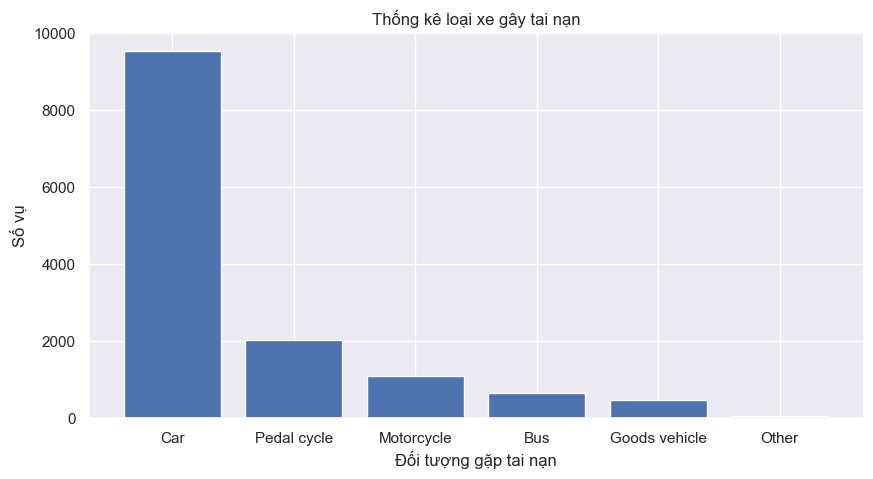

In [6]:
#TODO: visualize "Type of Vehicle"
check("Type of Vehicle")

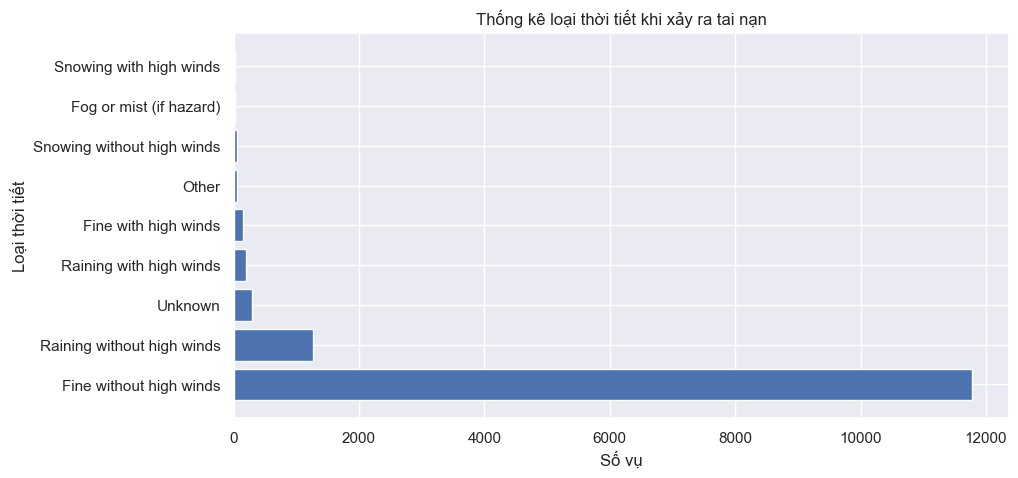

In [7]:
#TODO: visualize "Weather Conditions"
check("Weather Conditions")

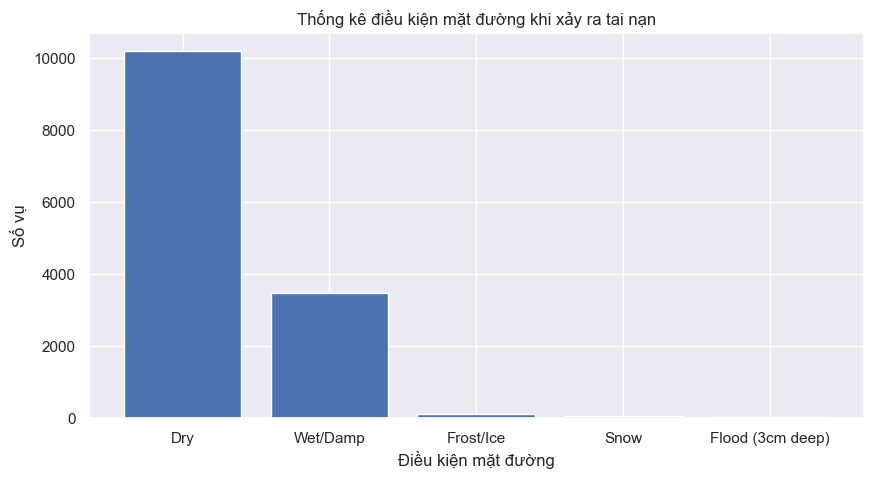

In [8]:
#TODO: visualize "Road Surface"
check("Road Surface")

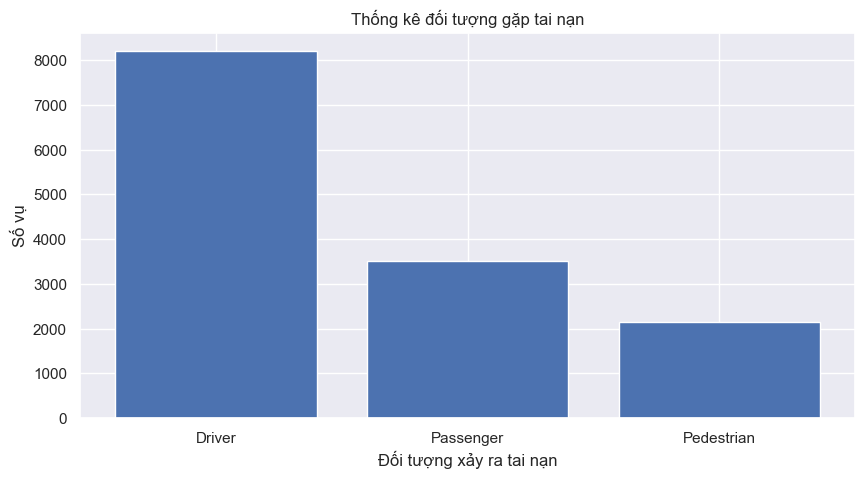

In [9]:
#TODO: visualize "Casualty Class"
check("Casualty Class")

**TODO**: Trả lời câu hỏi đã nêu ở yêu cầu 2.


### 1.1. Xu hướng chung của các vụ tai nạn

**Yêu cầu 3**: Xu hướng của các vụ tai nạn theo tháng và theo năm là gì?

- Tại đây các bạn sẽ vẽ 2 group bar chart (1 theo tháng và 1 theo năm). Trong mỗi group, cần thể hiện được số lượng các ca tai nạn theo mức độ (như vậy, mỗi group sẽ có 3 cột).
- Cũng trong 2 biểu đồ trên, các bạn vẽ thêm 2 line chart thể hiện tổng số ca bị tai nạn theo tháng/năm.

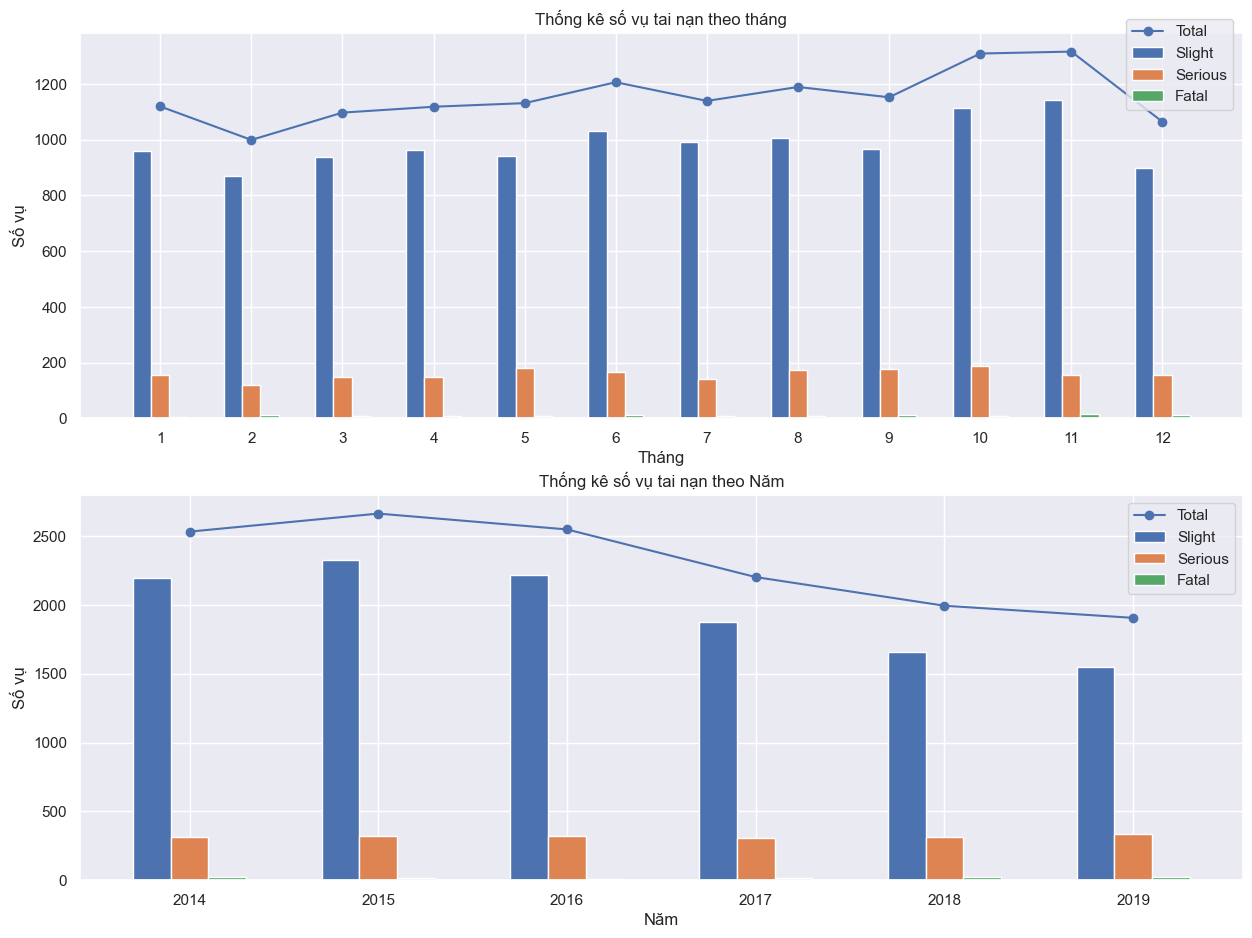

In [189]:
#TODO: draw your charts
from datetime import datetime
slight_month = {}
serious_month = {}
fatal_month = {}
total_month = {}
slight_year = {}
serious_year = {}
fatal_year = {}
total_year = {}
dt = []
list_year = []
list_month = []
for i in range(len(df.index)):
      dt.append(datetime.strptime(df["Accident Date"][i], '%Y-%m-%d'))
      list_month.append(dt[i].month)
      list_year.append(dt[i].year)
month = pd.unique(list_month)
year = pd.unique(list_year)
# ==========================================================================================
for i in month:
      slight_month[i], serious_month[i], fatal_month[i], total_month[i] = [0, 0, 0, 0]

for i in year:
      slight_year[i], serious_year[i], fatal_year[i], total_year[i] = [0, 0, 0, 0]
      
for i, value in enumerate(df["Casualty Severity"]):
      if value == "Slight":
            slight_month[dt[i].month] += 1
            slight_year[dt[i].year] += 1
      elif value == "Serious":
            serious_month[dt[i].month] += 1
            serious_year[dt[i].year] += 1
      elif value == "Fatal":
            fatal_month[dt[i].month] += 1
            fatal_year[dt[i].year] += 1

for m in month:
      total_month[m] = slight_month[m] + serious_month[m] + fatal_month[m] 

for y in year:
      total_year[y] = slight_year[y] + serious_year[y] + fatal_year[y]

figure, axis = plt.subplots(nrows = 2, ncols = 1, figsize = (15, 11))
# =================================== Theo tháng - Plot 1 ==================================
labels = month
x = np.arange(len(labels))
axis[0].plot(list(total_month.values()), '-o', label = "Total")
axis[0].bar(x - 0.2, list(slight_month.values()), width=0.2, label = 'Slight')
axis[0].bar(x, list(serious_month.values()), width=0.2, label = 'Serious')
axis[0].bar(x + 0.2, list(fatal_month.values()), width=0.2, label = 'Fatal')

axis[0].set_ylabel('Số vụ')
axis[0].set_xlabel('Tháng')
axis[0].set_title('Thống kê số vụ tai nạn theo tháng', loc = 'center')
axis[0].set_xticks(x, labels)
axis[0].legend(loc = (0.9, 0.8))
# fig.tight_layout()


#  ================================== Theo năm - Plot 2 =====================================
labels = year
x = np.arange(len(labels))

axis[1].plot(list(total_year.values()), '-o', label = "Total")
axis[1].bar(x - 0.2, list(slight_year.values()), width=0.2, label = 'Slight')
axis[1].bar(x, list(serious_year.values()), width=0.2, label = 'Serious')
axis[1].bar(x + 0.2, list(fatal_year.values()), width=0.2, label = 'Fatal')
axis[1].set_ylabel('Số vụ')
axis[1].set_xlabel('Năm')
axis[1].set_title('Thống kê số vụ tai nạn theo Năm')
axis[1].set_xticks(x, labels)
axis[1].legend()
fig.tight_layout()

plt.show()


**TODO**: Trả lời câu hỏi đã nêu ở yêu cầu 3. Thử giải thích tại sao.

**Yêu cầu 3**: Xu hướng của các vụ tai nạn theo tháng và theo năm là gì?

``Xu hướng của các vụ tai nạn theo tháng cao ``
* Đỉnh điểm là thời điểm tháng 10 đến tháng 11.
	* Lý do khoảng thời gian này thường xảy ra nhiều vụ tai nạn?

* Thấp nhất là khoảng thời gian từ tháng 1 đến tháng 2. Lý do là vì `khoảng thời gian này mọi người đang ăn tết, đánh bài, chơi lô chơi đề, ai gảnh đâu đi bốc đầu đầu năm đầu tết.`
` Xu hướng các vụ tai nạn theo năm đang giảm dần`
* Đây là điều tích cực mà chúng ta có thể thấy. Để đạt được thì nhiều người đã phải đổ mồ hôi, 

### 1.2. Khung giờ tai nạn trong ngày/tuần

**Yêu cầu 4**: Khung giờ nào trong ngày thường xảy ra tai nạn nhất?

- Tại đây bạn hãy vẽ biểu đồ cột thể hiện số lượng vụ tai nạn theo các khung giờ (các khoảng thời gian trong ngày).
- Các bạn tùy chọn khoảng thời gian để có minh họa tốt nhất giúp trả lời câu hỏi.

{0: 222, 1: 137, 2: 105, 3: 76, 4: 94, 5: 95, 6: 212, 7: 591, 8: 933, 9: 594, 10: 599, 11: 708, 12: 735, 13: 822, 14: 830, 15: 1102, 16: 1239, 17: 1268, 18: 1096, 19: 787, 20: 562, 21: 410, 22: 338, 23: 284}


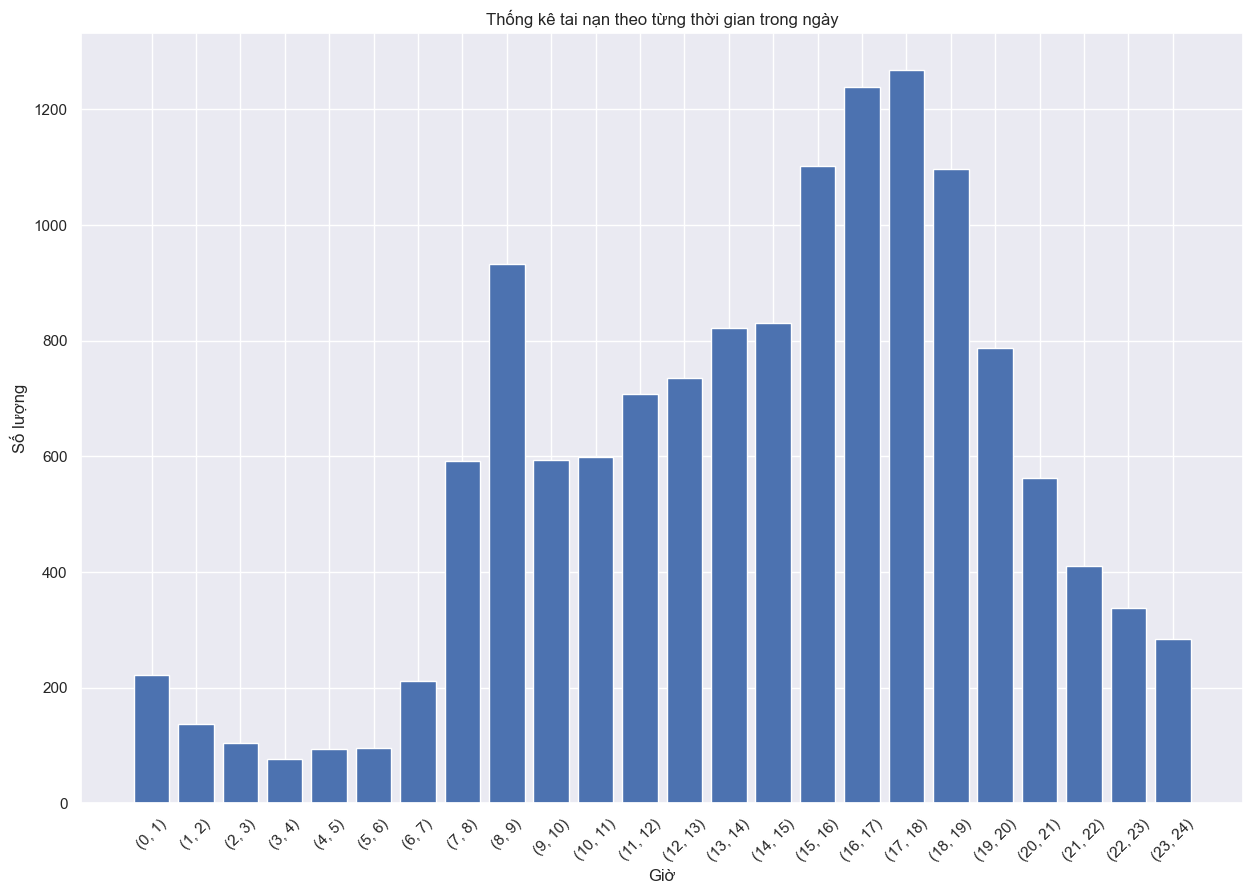

In [13]:
hour = []
for i in range(len(df.index)):
      datetime = datetime.strptime((df["Time (24hr)"][i]), '%H:%M:%S')
      hour.append(datetime.hour)

accident_time = {}
labels = [(i, i+1) for i in range(24)]
# for i in range(len(labels)):
#       accident_time[i] = hour.count(i)

accident_time = {i: hour.count(i) for i in range(len(labels))}
print(accident_time)
fig = plt.figure(figsize=(15, 10))
plt.bar(accident_time.keys(), accident_time.values())

plt.xlabel("Giờ")
plt.ylabel("Số lượng")
plt.title("Thống kê tai nạn theo từng thời gian trong ngày")
plt.xticks(np.arange(24), labels, rotation = 45)

plt.show()

**TODO**: Trả lời câu hỏi đã nêu ở yêu cầu 4. Thử giải thích tại sao.

**Yêu cầu 5**: Yêu cầu 4 đã giúp bạn xác định khoảng thời gian thường xảy ra tai nạn. Tuy nhiên, liệu ngày nào cũng xảy ra tai nạn vào các khung giờ đó? Tại đây, bạn sẽ tìm hiểu cụ thể xem ngày nào trong tuần thì hay xảy ra tai nạn.

- Các bạn sẽ vẽ 1 heatmap với trục tung thể hiện các thứ trong tuần (từ Thứ Hai đến CN) và trục hoành thể hiện giờ trong 1 ngày (0h->23h). Màu trong mỗi cell sẽ thể hiện số lượng tai nạn. Màu càng sáng thì tai nạn càng nhiều.

In [14]:
def convert_1d_to_2d(list, cols):
	return [list[j:j + cols] for j in range(0, len(list), cols)]

In [15]:
day_labels = ['Sunday', 'Saturday', 'Friday', 'Thursday', 'Wednesday', 'Tuesday', 'Monday']
hour_labels = list(range(24))
weekday = [i.isoweekday() for i in dt]

d = {'Weekday': weekday, 'Hour': hour}
data = pd.DataFrame(d, columns = ['Weekday', 'Hour'])

g = data.groupby(['Weekday', 'Hour'])
g.groups
g2 = g.aggregate(len)
# sns.heatmap(g2)

g3 = list(g2.values)
g4 = list(convert_1d_to_2d(g3, 24))
g4.reverse()


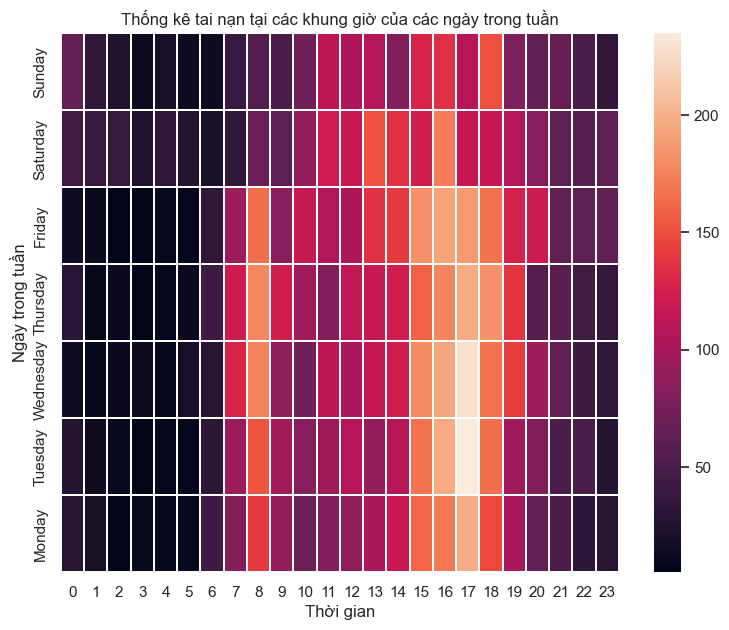

In [17]:
fig = plt.figure(figsize = (9, 7))
# sns.heatmap(g)
sns.heatmap(g4, linewidth=.25)
plt.xlabel("Thời gian")
plt.ylabel("Ngày trong tuần")
plt.yticks(np.arange(0.5, 7.5), day_labels)
plt.title("Thống kê tai nạn tại các khung giờ của các ngày trong tuần")
plt.show()

**TODO**: Đưa ra nhận xét về khoảng thời gian trong tuần thường xảy ra tai nạn. Thử giải thích tại sao.

### 1.3. Chi tiết về đối tượng và mức độ tai nạn

**Yêu cầu 6**: Nhóm tuổi nào thường xuyên gây tai nạn?

- Bạn sẽ vẽ biểu đồ cột thể hiện các số lượng các vụ tai nạn gây ra bởi các nhóm tuổi khác nhau.

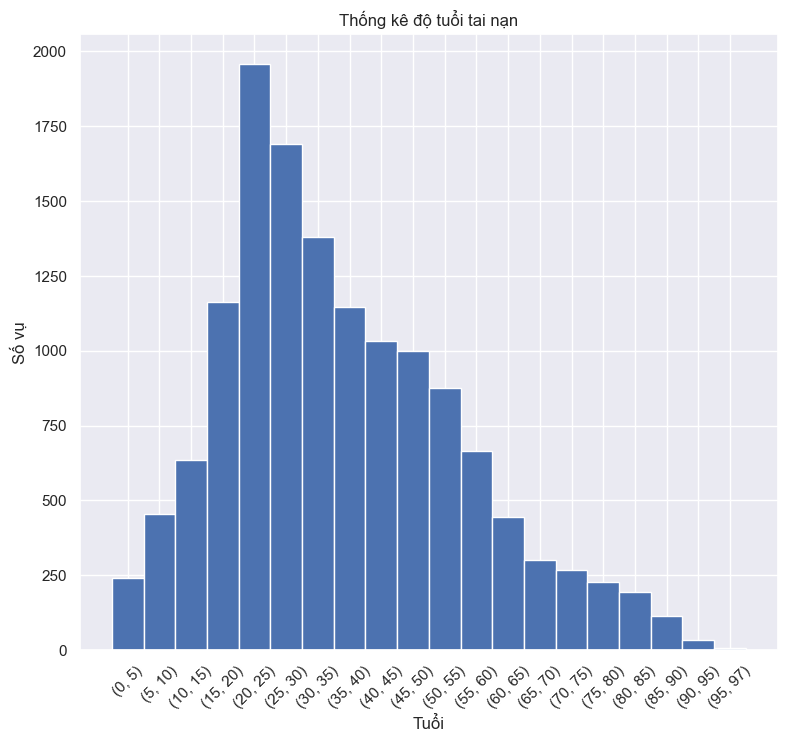

<Figure size 640x480 with 0 Axes>

In [18]:
accident_age = {}
labels = []
age = list(df["Age of Casualty"])
i = 0
while i < max(age):
      if i + 5 > max(age):
            labels.append((i, max(age)))
            accident_age[i] = sum(age.count(j) for j in range(i, max(age)))
            break
      labels.append((i, i + 5))
      accident_age[i] = sum(age.count(j) for j in range(i, i + 5))
      i += 5

fig = plt.figure(figsize = (9, 8))

values = list(accident_age.values())
keys = list(accident_age.keys())
plt.bar(keys, values, width = 5)
plt.xlabel("Tuổi")
plt.ylabel("Số vụ")
plt.title("Thống kê độ tuổi tai nạn")
plt.xticks(np.arange(0, 100, 5), labels, rotation = 45)
plt.show()
plt.tight_layout()


**TODO**: Trả lời câu hỏi đã nêu ở yêu cầu 6. Thử giải thích tại sao.

**Yêu cầu 7**: Tìm hiểu mối quan hệ giữa độ tuổi, giới tính, đối tượng và mức độ nghiêm trọng trong vụ tai nạn.

- Đề xuất 1 hoặc nhiều biểu đồ giúp biểu diễn mỗi quan hệ trên.
- Biện luận các mối quan hệ trên và cho biết việc rút ra quan hệ đó có ý nghĩa gì.

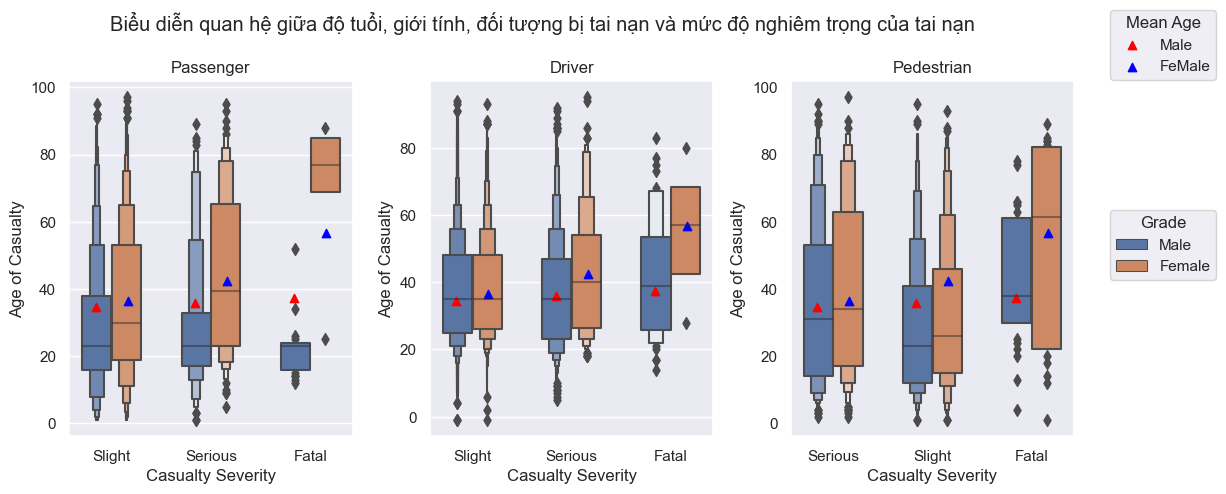

In [118]:
mean_age = df.groupby(["Sex of Casualty", 'Casualty Severity'])['Age of Casualty'].mean()
male = list(mean_age.loc['Male'])
female = list(mean_age.loc['Female'])
male.reverse()
female.reverse()
fig, ax = plt.subplots(figsize =  (11, 5), nrows = 1, ncols = 3)
sns.set(font_scale = 1)
hor_coordinates = np.arange(0,3)
casualty_class = list(pd.unique(df["Casualty Class"]))
for i in range(len(casualty_class)):
      plt.subplot(1, 3, i + 1)
      sns.boxenplot(x = "Casualty Severity", y = "Age of Casualty", hue = "Sex of Casualty", hue_order = ['Male','Female'], data = df[df["Casualty Class"] == casualty_class[i]], width = 0.6)
      plt.title(casualty_class[i])
      ax[i].get_legend().remove()
      m =  ax[i].scatter(hor_coordinates - 0.16, male, marker = '^', color = 'red')
      f = ax[i].scatter(hor_coordinates + 0.16, female, marker = "^",color = 'blue')
fig.suptitle("Biểu diễn quan hệ giữa độ tuổi, giới tính, đối tượng bị tai nạn và mức độ nghiêm trọng của tai nạn")

handles, labels = ax[0].get_legend_handles_labels()
fig.legend(handles, labels, bbox_to_anchor=(1.12, 0.6), title="Grade")
fig.legend([m, f], ['Male', 'FeMale'],bbox_to_anchor=(1.12, 1), title="Mean Age")
plt.grid(False)
plt.tight_layout()
plt.show()

**TODO**: Biện luận các mối quan hệ mà bạn tìm được. Giải thích ý nghĩa.

## 2. Trực quan hóa kết quả (2đ)

Tại đây, các bạn sẽ thử chạy một mô hình học máy. Sau đó trực quan kết quả xem xét hiệu quả của mô hình.

### 2.1. Chạy mô hình (1đ)

Các bạn sẽ chạy mô hình gom cụm dữ liệu. Để có thể đi tiếp, bạn cần phải trang bị một vài kiến thức sau đây:

- Bài toàn học không giám sát và ý tưởng về gom cụm ([clustering](https://www.geeksforgeeks.org/clustering-in-machine-learning/)).
- Thuật toán cơ bản trong bài toán gom cụm mà chúng ta sẽ sử dụng: [KMeans](https://machinelearningcoban.com/2017/01/01/kmeans/).
- Tập dữ liệu mà bạn sẽ làm việc: [Iris](https://archive.ics.uci.edu/ml/datasets/iris).

In [89]:
from sklearn_extra.cluster import KMedoids
from sklearn.cluster import KMeans
from sklearn import datasets
iris = datasets.load_iris()

Tại đây, các bạn gom cụm với 2/4 thuộc tính của tập dữ liệu để dễ dàng cho việc trực quan hóa: `Petal length` và `Petal width`.

[[1.4 0.2]
 [1.4 0.2]
 [1.3 0.2]
 [1.5 0.2]
 [1.4 0.2]
 [1.7 0.4]
 [1.4 0.3]
 [1.5 0.2]
 [1.4 0.2]
 [1.5 0.1]
 [1.5 0.2]
 [1.6 0.2]
 [1.4 0.1]
 [1.1 0.1]
 [1.2 0.2]
 [1.5 0.4]
 [1.3 0.4]
 [1.4 0.3]
 [1.7 0.3]
 [1.5 0.3]
 [1.7 0.2]
 [1.5 0.4]
 [1.  0.2]
 [1.7 0.5]
 [1.9 0.2]
 [1.6 0.2]
 [1.6 0.4]
 [1.5 0.2]
 [1.4 0.2]
 [1.6 0.2]
 [1.6 0.2]
 [1.5 0.4]
 [1.5 0.1]
 [1.4 0.2]
 [1.5 0.2]
 [1.2 0.2]
 [1.3 0.2]
 [1.4 0.1]
 [1.3 0.2]
 [1.5 0.2]
 [1.3 0.3]
 [1.3 0.3]
 [1.3 0.2]
 [1.6 0.6]
 [1.9 0.4]
 [1.4 0.3]
 [1.6 0.2]
 [1.4 0.2]
 [1.5 0.2]
 [1.4 0.2]
 [4.7 1.4]
 [4.5 1.5]
 [4.9 1.5]
 [4.  1.3]
 [4.6 1.5]
 [4.5 1.3]
 [4.7 1.6]
 [3.3 1. ]
 [4.6 1.3]
 [3.9 1.4]
 [3.5 1. ]
 [4.2 1.5]
 [4.  1. ]
 [4.7 1.4]
 [3.6 1.3]
 [4.4 1.4]
 [4.5 1.5]
 [4.1 1. ]
 [4.5 1.5]
 [3.9 1.1]
 [4.8 1.8]
 [4.  1.3]
 [4.9 1.5]
 [4.7 1.2]
 [4.3 1.3]
 [4.4 1.4]
 [4.8 1.4]
 [5.  1.7]
 [4.5 1.5]
 [3.5 1. ]
 [3.8 1.1]
 [3.7 1. ]
 [3.9 1.2]
 [5.1 1.6]
 [4.5 1.5]
 [4.5 1.6]
 [4.7 1.5]
 [4.4 1.3]
 [4.1 1.3]
 [4.  1.3]
 [4.4 1.2]

Text(0.5, 1.0, 'Phân lớp chính xác')

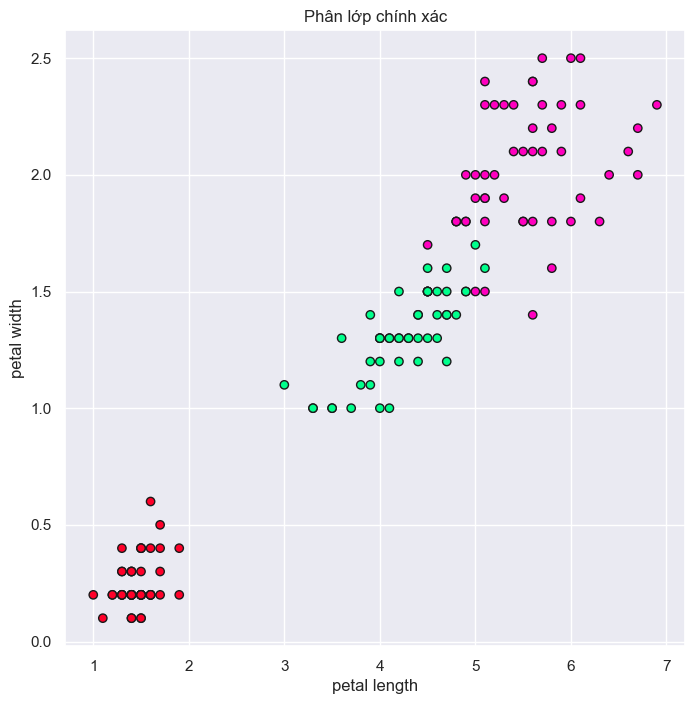

In [93]:
X = iris.data[:,2:]
y = iris.target
print(X)
fig, axes = plt.subplots(figsize=(8,8))
print(pd.unique(y))
axes.scatter(X[:,0], X[:,1], c=y, cmap='gist_rainbow', edgecolor='k')
axes.set_xlabel('petal length')
axes.set_ylabel('petal width')
axes.set_title('Phân lớp chính xác')

Lưu ý rằng: Trong bài toán gom cụm, chúng ta hoàn toàn không biết trước số cụm tối ưu. Minh họa về phân cụm tối ưu bên trên nhằm mục tiêu giúp các bạn so sánh các phân cụm mà các bạn tìm được.

Để tìm được số cụm tối ưu, chúng ta sử dụng kỹ thuật **thử và sai**. Nghĩa là bạn sẽ thử gom cụm với số cụm trong 1 khoảng xác định. Tại đây, bạn sẽ thực hiện việc này.

In [ ]:
#TODO: perform KMeans with the number of clusters from 2 to 10
raise NotImplementedError()

### 2.2. Trực quan hóa kết quả (1đ)

Tiếp theo bạn sẽ thực hiện trực quan hóa kết quả gom cụm và đối chiếu với kết quả phân lớp chính xác. Từ đây, bạn có thể thấy (bằng mắt) một vài giá trị k tiềm năng. Lưu ý: Hình mẫu mà được cung cấp có 1 vài màu nhìn khá giống nhau. Các bạn hãy zoom lên để nhận biết được các màu này dễ hơn.

In [ ]:
#TODO: draw the results and the 
raise NotImplementedError()

Tuy nhiên, việc kiểm tra bằng mắt đôi khi không khả thi (giả sử khi số lượng mẫu thử và sai quá lớn). Do đó, cần một độ đo để kiểm tra chất lượng gom cụm. Tiếp theo, các bạn sẽ tìm hiểu và trình bày ngắn gọn về **Elbow method**. Sau đó, bạn sẽ trực quan hóa kết quả sử dụng **Elbow method** để chọn được số cụm thích hợp.

**TODO**: Tìm hiểu và trình bày về **Elbow method**

In [ ]:
#TODO: visualize results using elbow method and pick the right number of clusters
raise NotImplementedError()

**TODO**: Số cụm thích hợp